In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import glob
from create_fracture import *
from past_fracture import *
from base_aug import *

root = 'images/input'
save = 'images/outputs'

# create images with fractures from a sine function 

In [3]:


i = 0

base_file = json.load(open(os.path.join(root,'base file.json')))

for img in glob.glob(os.path.join(root, 'base image.jpg')): # use imagefolder/* to loop on all base images
    i +=1
    img0 = open_img(img)
    
    for j in range (1):
        img = aug_base_sine(img0)
        img = np.array(img)
        img = np.rot90(img, 3)
        points_x, points_y = creat_sine(img)
        points_x, points_y = get_segmets(points_x, points_y)
        initial_mask = create_initial_mask(img, points_x, points_y)

        image_with_fracture, thickness = generate_image(img, initial_mask,
                                             sigma_x= 0.8 , intensity=0.5,
                                             k_d =2, iter_ = 2,
                                             edges =2, clipping_value= 150) #150
        if thickness > 2: #to ignore fine fractures (all segments are very thin)
            image_with_fracture = np.rot90(image_with_fracture)
            image_with_fracture = Image.fromarray(image_with_fracture)
            mask = np.rot90(initial_mask)
            name = str(i)+'_sine_fun.jpg'
            image_with_fracture.save( os.path.join(save, 'img_'+name))
            ann = create_ann_json(base_file, mask)
            with open(os.path.join(save, 'ann_'+name+'.json'), 'w') as f:  #name consistent with supervisly
                       json.dump(ann, f, indent=4)
#             print(i, j)
        else: print('excluded, average thickness:', thickness)
        
print('done:', i)

plt.imshow(image_with_fracture)

thick 2.901666666666667
done: 1


# create images with fractures from real fracture shapes/masks

i
thick 11.272592079969243
0


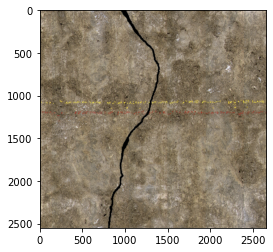

In [4]:


i = 0


base_file = json.load(open(os.path.join(root,'base file.json')))

for img in glob.glob(os.path.join(root, 'base image.jpg')): # use imagefolder/* to loop on all base images

    for m in glob.glob(os.path.join(root, 'fracture mask.jpg')):

        image = open_img(img)
        image = aug_base_real(image)
        image = np.array(image)

        mask = open_mask(m)
        mask = change_thickness(mask)
        mask = resize_width (mask)
        if image.shape[1] > mask.shape[1]:
            print('i')
            base = image
            base, mask = match_img_mask (base, mask)
            image_with_fracture, _ = generate_image(base, mask,
                                                 sigma_x= 0.8 , intensity=0.3,
                                                 k_d =2, iter_ =5,
                                                 edges =3, clipping_value= 90)

            image_with_fracture = Image.fromarray(image_with_fracture)

            
                    
            name = str(i)+'_N.jpg'
            image_with_fracture.save( os.path.join(save, 'img_'+name))
            ann = create_ann_json(base_file, mask)
            with open(os.path.join(save, 'ann_'+name+'.json'), 'w') as f:  #name consistent with supervisly
                       json.dump(ann, f, indent=4)
            print(i)
            i +=1
            
plt.imshow(image_with_fracture)    